# Question: Which factor(s) is most correlated with youth marijuana use?

In [1]:
# import statements at top to keep things more organized
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingRegressor
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor

In [2]:
data = pd.read_csv('youth_data.csv')
data.head()

,IRALCFY,IRMJFY,IRCIGFM,IRSMKLSS30N,IRALCFM,IRMJFM,IRCIGAGE,IRSMKLSSTRY,IRALCAGE,IRMJAGE,...,EDUSCHLGO,EDUSCHGRD2,EDUSKPCOM,IMOTHER,IFATHER,INCOME,GOVTPROG,POVERTY3,PDEN10,COUTYP4
0,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,3,0,1,1,2,2,1,2,2
1,991,60,91.0,91,91.0,2.0,991,991,991,14,...,1,6,0,1,1,2,2,1,2,2
2,1,991,91.0,91,93.0,91.0,991,991,11,991,...,1,2,1,1,1,4,2,3,1,1
3,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,2,0,1,1,3,2,2,1,1
4,991,991,91.0,91,91.0,91.0,991,991,991,991,...,1,5,0,1,1,4,2,3,2,2


In [3]:
data.shape

(10561, 79)

In [4]:
data.columns

Index(['IRALCFY', 'IRMJFY', 'IRCIGFM', 'IRSMKLSS30N', 'IRALCFM', 'IRMJFM',
       'IRCIGAGE', 'IRSMKLSSTRY', 'IRALCAGE', 'IRMJAGE', 'MRJFLAG', 'ALCFLAG',
       'TOBFLAG', 'ALCYDAYS', 'MRJYDAYS', 'ALCMDAYS', 'MRJMDAYS', 'CIGMDAYS',
       'SMKLSMDAYS', 'SCHFELT', 'TCHGJOB', 'AVGGRADE', 'STNDSCIG', 'STNDSMJ',
       'STNDALC', 'STNDDNK', 'PARCHKHW', 'PARHLPHW', 'PRCHORE2', 'PRLMTTV2',
       'PARLMTSN', 'PRGDJOB2', 'PRPROUD2', 'ARGUPAR', 'YOFIGHT2', 'YOGRPFT2',
       'YOHGUN2', 'YOSELL2', 'YOSTOLE2', 'YOATTAK2', 'PRPKCIG2', 'PRMJEVR2',
       'PRMJMO', 'PRALDLY2', 'YFLPKCG2', 'YFLTMRJ2', 'YFLMJMO', 'YFLADLY2',
       'FRDPCIG2', 'FRDMEVR2', 'FRDMJMON', 'FRDADLY2', 'TALKPROB', 'PRTALK3',
       'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'YTHACT2',
       'DRPRVME3', 'ANYEDUC3', 'RLGATTD', 'RLGIMPT', 'RLGDCSN', 'RLGFRND',
       'IRSEX', 'NEWRACE2', 'HEALTH2', 'EDUSCHLGO', 'EDUSCHGRD2', 'EDUSKPCOM',
       'IMOTHER', 'IFATHER', 'INCOME', 'GOVTPROG', 'POVERTY3', 'PDEN10',

In [5]:
# features of interest
# I grouped them into categories which I think might have an influence
edu = ['AVGGRADE', 'EDUSCHLGO', 'EDUSCHGRD2', 'EDUSKPCOM']
family = ['PARCHKHW', 'PARHLPHW', 'PRCHORE2', 'PRLMTTV2', 'PARLMTSN', 'PRGDJOB2', 'PRPROUD2', 'ARGUPAR']
peer = ['FRDMEVR2', 'FRDMJMON']
mental_health = ['SCHFELT', 'TALKPROB', 'PRTALK3', 'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2']
demographics = ['IRSEX', 'NEWRACE2', 'HEALTH2', 'IMOTHER', 'IFATHER', 'INCOME', 'GOVTPROG', 'POVERTY3', 'PDEN10', 'COUTYP4']

# target variables
target = ['MRJFLAG', 'MRJYDAYS', 'MRJMDAYS']

In [6]:
data = data[(edu + family + peer + mental_health + demographics + target)]
data.head()

,AVGGRADE,EDUSCHLGO,EDUSCHGRD2,EDUSKPCOM,PARCHKHW,PARHLPHW,PRCHORE2,PRLMTTV2,PARLMTSN,PRGDJOB2,...,IMOTHER,IFATHER,INCOME,GOVTPROG,POVERTY3,PDEN10,COUTYP4,MRJFLAG,MRJYDAYS,MRJMDAYS
0,2.0,1,3,0,1.0,1.0,1.0,2.0,1.0,1.0,...,1,1,2,2,1,2,2,0,6,5
1,2.0,1,6,0,1.0,1.0,2.0,2.0,1.0,1.0,...,1,1,2,2,1,2,2,1,3,1
2,2.0,1,2,1,1.0,1.0,1.0,1.0,1.0,2.0,...,1,1,4,2,3,1,1,0,6,5
3,NaN,1,2,0,1.0,2.0,2.0,2.0,2.0,1.0,...,1,1,3,2,2,1,1,0,6,5
4,2.0,1,5,0,2.0,1.0,1.0,2.0,2.0,1.0,...,1,1,4,2,3,2,2,0,6,5


In [7]:
data.columns

Index(['AVGGRADE', 'EDUSCHLGO', 'EDUSCHGRD2', 'EDUSKPCOM', 'PARCHKHW',
       'PARHLPHW', 'PRCHORE2', 'PRLMTTV2', 'PARLMTSN', 'PRGDJOB2', 'PRPROUD2',
       'ARGUPAR', 'FRDMEVR2', 'FRDMJMON', 'SCHFELT', 'TALKPROB', 'PRTALK3',
       'PRBSOLV2', 'PREVIOL2', 'PRVDRGO2', 'GRPCNSL2', 'PREGPGM2', 'IRSEX',
       'NEWRACE2', 'HEALTH2', 'IMOTHER', 'IFATHER', 'INCOME', 'GOVTPROG',
       'POVERTY3', 'PDEN10', 'COUTYP4', 'MRJFLAG', 'MRJYDAYS', 'MRJMDAYS'],
      dtype='object')

In [8]:
# rename the columns to be more interpretable and readable later on when plotting and such
data.columns = [
    'Avg_Grades',                # AVGGRADE
    'School_Attendance',         # EDUSCHLGO
    'Highest_Grade',             # EDUSCHGRD2
    'School_Problems_Comm',      # EDUSKPCOM
    'Parent_Checks_Homework',    # PARCHKHW
    'Parent_Helps_Homework',     # PARHLPHW
    'Does_Chores',               # PRCHORE2
    'Limited_TV_Time',           # PRLMTTV2
    'Parents_Set_Limits',        # PARLMTSN
    'Good_Job_Approval',         # PRGDJOB2
    'Parent_Pride',              # PRPROUD2
    'Parent_Arguments',          # ARGUPAR
    'Friend_Offered_Drugs',      # FRDMEVR2
    'Friends_Use_Marijuana',     # FRDMJMON
    'School_Felt_Unsafe',        # SCHFELT
    'Talked_About_Problems',     # TALKPROB
    'Can_Talk_To_Parents',       # PRTALK3
    'Problem_Solving_Support',   # PRBSOLV2
    'Violent_Peer_Influence',    # PREVIOL2
    'Private_Doctor_Visits',     # PRVDRGO2
    'Group_Counseling',          # GRPCNSL2
    'Pregnancy_Program',         # PREGPGM2
    'Sex',                       # IRSEX
    'Race',                      # NEWRACE2
    'Health_Status',             # HEALTH2
    'Mother_Present',            # IMOTHER
    'Father_Present',            # IFATHER
    'Household_Income',          # INCOME
    'Govt_Assistance_Use',       # GOVTPROG
    'Poverty_Level',             # POVERTY3
    'Population_Density',        # PDEN10
    'County_Type',               # COUTYP4
    'Used_Marijuana_Flag',       # MRJFLAG (target, binary)
    'Days_Used_This_Year',       # MRJYDAYS (target, reg)
    'Days_Used_This_Month'       # MRJMDAYS (target, multiclass)
]

In [9]:
# check for null/missing values
print(data.isna().sum().tolist())

[716, 0, 0, 0, 77, 89, 35, 68, 259, 63, 77, 180, 152, 152, 0, 336, 199, 286, 142, 102, 120, 98, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
data.shape, data.dropna().shape
# if we drop rows with missing values, we lose too much data (~10%) so impute instead

((10561, 35), (8967, 35))

In [11]:
set(data.dtypes) # we only have numerical data types so just impute with mean

{dtype('int64'), dtype('float64')}

In [12]:
# impute
for col in list(data.columns):
    if data[col].isna().sum() > 0:
        data[col] = data[col].fillna(data[col].mean())

In [13]:
data.head()

,Avg_Grades,School_Attendance,Highest_Grade,School_Problems_Comm,Parent_Checks_Homework,Parent_Helps_Homework,Does_Chores,Limited_TV_Time,Parents_Set_Limits,Good_Job_Approval,...,Mother_Present,Father_Present,Household_Income,Govt_Assistance_Use,Poverty_Level,Population_Density,County_Type,Used_Marijuana_Flag,Days_Used_This_Year,Days_Used_This_Month
0,2.000000,1,3,0,1.0,1.0,1.0,2.0,1.0,1.0,...,1,1,2,2,1,2,2,0,6,5
1,2.000000,1,6,0,1.0,1.0,2.0,2.0,1.0,1.0,...,1,1,2,2,1,2,2,1,3,1
2,2.000000,1,2,1,1.0,1.0,1.0,1.0,1.0,2.0,...,1,1,4,2,3,1,1,0,6,5
3,1.941696,1,2,0,1.0,2.0,2.0,2.0,2.0,1.0,...,1,1,3,2,2,1,1,0,6,5
4,2.000000,1,5,0,2.0,1.0,1.0,2.0,2.0,1.0,...,1,1,4,2,3,2,2,0,6,5


## Binary Classifcation using Decision Tree Classifier

In [14]:
# split train and test
train = data.drop(columns = ['Used_Marijuana_Flag', 'Days_Used_This_Year', 'Days_Used_This_Month'])
test = data['Used_Marijuana_Flag']
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = .2, random_state = 5322)

In [15]:
param_grid = {
    'max_depth': [3, 5, 10, 20, x_train.shape[1]],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

binary_dt = DecisionTreeClassifier(random_state = 5322)
grid_search = GridSearchCV(
    estimator = binary_dt,
    param_grid = param_grid,
    cv = 5,
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1
)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5322),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [3, 5, 10, 20, 32],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 5, 10]},
             scoring='f1', verbose=1)

In [16]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [17]:
best_binary_dt = grid_search.best_estimator_

binary_dt_pred = best_binary_dt.predict(x_test)
print(classification_report(y_test, binary_dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1781
           1       0.52      0.60      0.56       332

    accuracy                           0.85      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.86      0.85      0.85      2113



Class 0 (No marijuana used ever):
- Precision: .92 --> Of all the people predicted as non-users of marijuana, 92% were actually non-users. This means our model is good at identifying non-users. Few false positives
- Recall: .90 --> Of all the actual non-users, 90% were correctly identified as non-users. This means our model is good at catching non-users. Few false negatives.
- F1-score: .91 --> Suggests the model is good at identifying non-users

Class 1 (Used marijuana):
- Precision: .52 --> Of all the people predicted to be users of marijuana, only 52% were actually users. This means the model is not good at identifying users of marijuana. Some false positives
- Recall: .60 --> Of all the actual marijuana users, 60% were correctly identified. This means the model is not good at catching users. Some false negatives.
- F1-score: .56 --> Suggests model struggles with identifying users of marijuana.

Accuracy: .85 --> 85% is a good accuracy, but it is a little midleading since our data has very clear class imbalance. Far more people who have not used versus used, so our model does well on non-users, but very poorly on users.

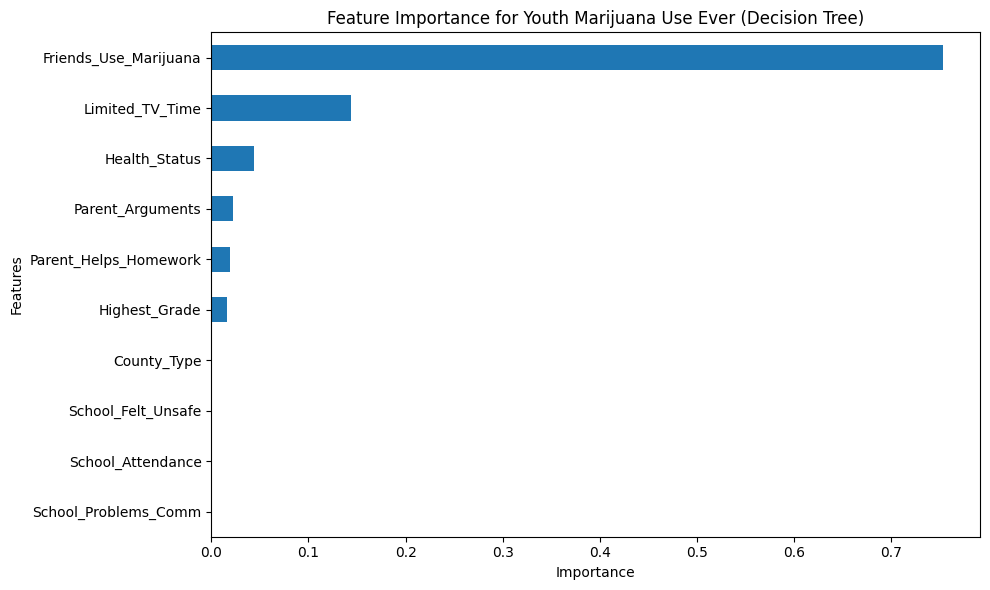

In [18]:
# see which features are most influential
importances = pd.Series(
    best_binary_dt.feature_importances_, 
    index = x_train.columns
).sort_values(ascending = True)

plt.figure(figsize = (10, 6))
importances.tail(10).plot(kind = 'barh')
plt.title("Feature Importance for Youth Marijuana Use Ever (Decision Tree)")
plt.ylabel("Features")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

Friends Use Marijuana is the most influential factor by far. Peer pressure is real I guess. The others were mostly pretty intuitive or things you have heard or read about in papers (parents argue, problems with school, etc.). The only surprising factor was Parent Helps Homework. Smoking marijuana depending on whether your parents helped you on your homework seems a very weird. Limited TV Time was also somewhat surprising, but I figured if you watch a lot of tv shows where the main characters use drugs could definitely have an influence.

## Binary Classification using Bagging (with previous section's best decision tree as base tree)

Hopefully we will see some new features influencing the model. Even though we use the best decision tree above as the base tree, bagging should yield at least slightly different results since bagging is like asking a hundred similar trees for an opinion, then averaging them, while the decision tree above was just the best one from grid search. Bagging does bootstrapping so it might lead to different tree structures and splits. Also might be more stable since we average over a lot of trees.

In [19]:
# Use best decision tree from above as base tree for bagging
# Use grid search again to get find better hyperparameters
bagging_base = best_binary_dt
binary_bag = BaggingClassifier(estimator = bagging_base, random_state = 5322)

param_grid = {
    'n_estimators': [10, 50, 75, 100],
    'max_samples': [.7, .75, .8],
    'max_features': [.3, .5, .7, 1],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator = binary_bag,
    param_grid = param_grid,
    cv = 5,
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1
)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                          max_depth=3,
                                                                          max_features='sqrt',
                                                                          random_state=5322),
                                         random_state=5322),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.3, 0.5, 0.7, 1],
                         'max_samples': [0.7, 0.75, 0.8],
                         'n_estimators': [10, 50, 75, 100]},
             scoring='f1', verbose=1)

In [20]:
grid_search.best_params_

{'bootstrap': False,
 'max_features': 0.7,
 'max_samples': 0.7,
 'n_estimators': 50}

In [21]:
best_binary_bag = grid_search.best_estimator_

binary_bag_pred = best_binary_bag.predict(x_test)
print(classification_report(y_test, binary_bag_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1781
           1       0.44      0.73      0.55       332

    accuracy                           0.81      2113
   macro avg       0.69      0.78      0.71      2113
weighted avg       0.86      0.81      0.83      2113



Class 0 (No marijuana used ever):
- Precision: .94 --> Of all the people predicted as non-users of marijuana, 94% were actually non-users. This means our model is good at identifying non-users. Few false positives
- Recall: .83 --> Of all the actual non-users, 83% were correctly identified as non-users. This means our model is good at catching non-users, but misses some. Some false negatives.
- F1-score: .88 --> Good balance of precision and recall suggests the model is good at identifying non-users

Class 1 (Used marijuana):
- Precision: .44 --> Of all the people predicted to be users of marijuana, only 44% were actually users. This means the model is not good at identifying users of marijuana. Some false positives
- Recall: .73 --> Of all the actual marijuana users, 73% were correctly identified. This means the model is okay at catching users. Some false negatives.
- F1-score: .55 --> Tries to balance precision and recaal, but struggles.

Accuracy: .81 --> 81% is a good accuracy, but again, it is a little midleading since our data has very clear class imbalance. Far more people who have not used versus used, so our model does well on non-users, but very poorly on users.
Decent model, but needs more class 1 data points to improve detecting marijuana users. Overall, did worse that the basic decision tree above (the one we used as the base tree).

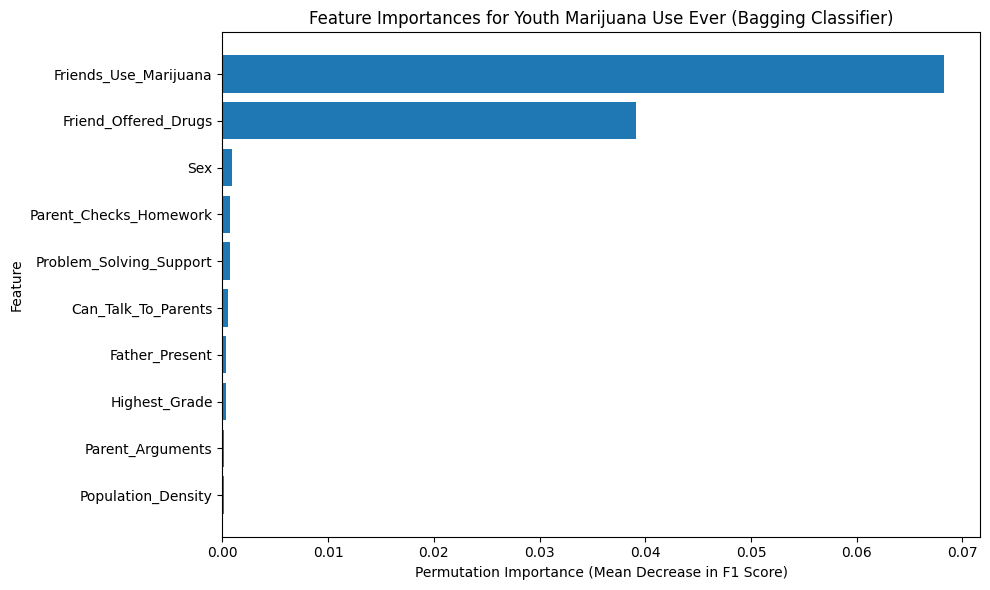

In [22]:
result = permutation_importance(best_binary_bag, x_test, y_test, n_repeats = 10, random_state = 5322, n_jobs = -1)

sorted_idx = result.importances_mean.argsort()[::-1]

top_features = [x_test.columns[i] for i in sorted_idx[:10]]
top_importances = result.importances_mean[sorted_idx[:10]]

plt.figure(figsize = (10, 6))
plt.barh(top_features[::-1], top_importances[::-1])
plt.title("Feature Importances for Youth Marijuana Use Ever (Bagging Classifier)")
plt.xlabel("Permutation Importance (Mean Decrease in F1 Score)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Even though we did use the best decision tree from earlier as the base tree for this bagging model, there was a bit of a difference in feature importance. Some new ones we see are friend offered drugs, sex, problem solving support, etc. The main difference is friend offered drugs, but nothing surprising or completely out of the blue here either. Similar patterns. Since there was no feature importance attribute for bagging models, I used permutation importance which just sees how much the models performance decreases when the values of a feautre are shuffled or permuted.

## Multiclass Classification using Random Forest Classifier

In [23]:
# split train and test
# create labels for each class
train = data.drop(columns = ['Used_Marijuana_Flag', 'Days_Used_This_Year', 'Days_Used_This_Month'])
bins = [0, 2, 4, 5]
labels = ['Sometimes', 'Addict', 'Never']
test = pd.cut(data['Days_Used_This_Month'], bins = bins, labels = labels)
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = .2, random_state = 5322)

In [24]:
data['Days_Used_This_Month'].value_counts()

Days_Used_This_Month
5    9809
4     209
3     199
1     195
2     149
Name: count, dtype: int64

In [25]:
# 1 = 1-2 days
# 2 = 3-5 days
# 3 = 6-19 days
# 4 = 20-30 days
# 5 = non-user or no past month use
test.value_counts().sort_index()

Days_Used_This_Month
Sometimes     344
Addict        408
Never        9809
Name: count, dtype: int64

In [26]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 10, x_train.shape[1]],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
    'bootstrap': [True, False]
}

multi_rf = RandomForestClassifier(random_state = 5322)
grid_search = GridSearchCV(
    estimator = multi_rf,
    param_grid = param_grid,
    cv = 5,
    n_jobs = -1,
    verbose = 1
)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=5322),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced'],
                         'max_depth': [3, 5, 10, 32],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [100, 200]},
             verbose=1)

In [27]:
grid_search.best_params_

{'bootstrap': False,
 'class_weight': None,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [28]:
# optimal model & results
best_multi_rf = grid_search.best_estimator_

multi_pred = best_multi_rf.predict(x_test)
print(classification_report(y_test, multi_pred, zero_division = 0))

              precision    recall  f1-score   support

      Addict       0.33      0.01      0.02        78
       Never       0.93      1.00      0.96      1954
   Sometimes       0.00      0.00      0.00        81

    accuracy                           0.92      2113
   macro avg       0.42      0.34      0.33      2113
weighted avg       0.87      0.92      0.89      2113



Again, there is class imbalance

Addict:
- Precision: .33 --> Of all the predictions labeled "Addict", only 33% were addicts. Our model is terrible (worse than flipping a coin to determine outcome) at identifying addicts. A lot of false positives.
- Recall: .01 --> Of all the true "Addict" cases, only 1% were correctly identified. Almost all addicts were missed. A lot of false negatives
- F1-score: .02 --> Model fails to identify addicts

Never:
- Precision: .93 --> Of all the predictions labeled "Never", 93% were those who have never used marijuana. Model is amazing at identifying non-users (or users that have not used in the past 30 days). Hardly any false positives
- Recall: 1.00 --> Of all the true "Never" cases, 100% were correctly identified. All non-users and not-used-in-past-30-days were correctly identified. No false negatives.
- F1-score: .96 --> Good balance of precision and recall for non-users and not-used-in-past-30-days people.

Sometimes:
- Precision: 0 --> The model did not predict "Sometimes" at all.
- Recall: 0 --> None of the actual "Sometimes" people were correctly identified since there were no predictions.
- F1-score: 0 --> Model failed to identify "Sometimes" users.

Accuracy: .92 --> Good accuracy, but again, misleading. Due to our data having a clear class imbalance, our model is only very good at identifying those who have not used marijuana ever or those who have not used marijuana in the past 30 days.

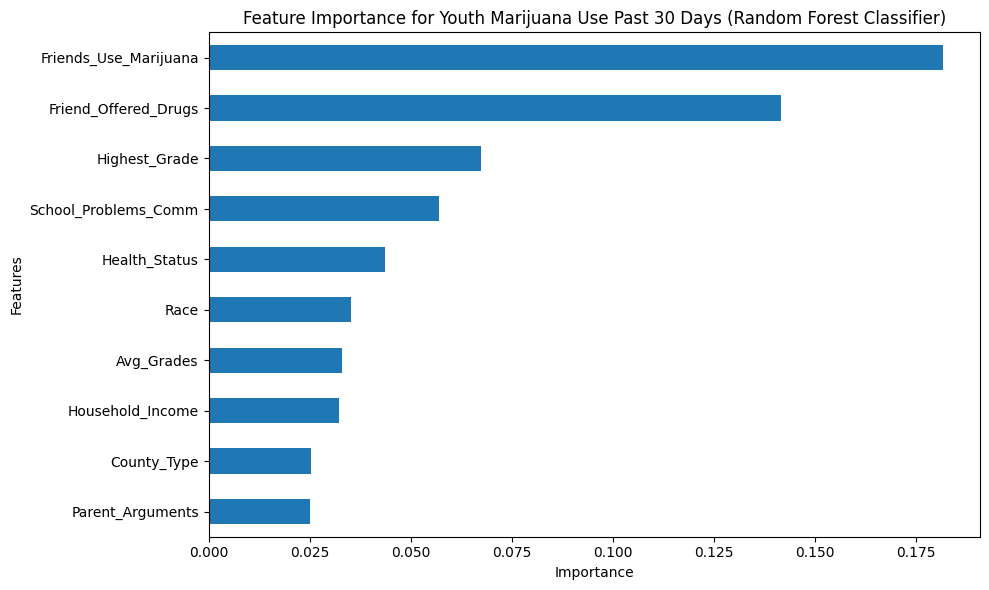

In [29]:
# see which features are most influential
importances = pd.Series(
    best_multi_rf.feature_importances_, 
    index = x_train.columns
).sort_values(ascending = True)

plt.figure(figsize = (10, 6))
importances.tail(10).plot(kind = 'barh')
plt.title("Feature Importance for Youth Marijuana Use Past 30 Days (Random Forest Classifier)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

We see similar features here as well. Like the other models, friends use marijuana and friend offered drugs seem to be the big features of influence. (So are they really your friends lol). Highest grade and race are somewhat new ones. Not really surprised here either. Pretty intuitive because of all those middle and high school assemblies and papers we had to write about drug use stuff.

## Multiclass Classification using Decision Tree

In [30]:
# split train and test data
# create labels for each class
train = data.drop(columns = ['Used_Marijuana_Flag', 'Days_Used_This_Year', 'Days_Used_This_Month'])
bins = [0, 2, 4, 5]
labels = ['Sometimes', 'Addict', 'Never']
test = pd.cut(data['Days_Used_This_Month'], bins = bins, labels = labels)
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = .2, random_state = 5322)

In [31]:
param_grid = {
    'max_depth': [3, 5, 10, 20, x_train.shape[1]],
    'min_samples_split': [2, 3, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

multi_dt = DecisionTreeClassifier(random_state = 5322)
grid_search = GridSearchCV(
    estimator = multi_dt,
    param_grid = param_grid,
    cv = 5,
    scoring = 'f1_weighted',
    n_jobs = -1,
    verbose = 1
)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5322),
             n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [3, 5, 10, 20, 32],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 3, 5, 10]},
             scoring='f1_weighted', verbose=1)

In [32]:
best_multi_dt = grid_search.best_estimator_

multi_dt_pred = best_multi_dt.predict(x_test)
print(classification_report(y_test, multi_dt_pred))

              precision    recall  f1-score   support

      Addict       0.23      0.15      0.18        78
       Never       0.93      0.98      0.96      1954
   Sometimes       0.33      0.01      0.02        81

    accuracy                           0.91      2113
   macro avg       0.50      0.38      0.39      2113
weighted avg       0.88      0.91      0.89      2113



Again, there is class imbalance.

Addict:
- Precision: .23 --> Of all the predictions labeled "Addict", only 23% were addicts. Our model is terrible (worse than flipping a coin to determine outcome) at identifying addicts. A lot of false positives.
- Recall: .15 --> Of all the true "Addict" cases, only 15% were correctly identified. Almost all addicts were missed. A lot of false negatives.
- F1-score: .18 --> Model fails to identify addicts.

Never:
- Precision: .93 --> Of all the predictions labeled "Never", 93% were those who have never used marijuana. Model is amazing at identifying non-users (or users that have not used in the past 30 days). Hardly any false positives.
- Recall: .98 --> Of all the true "Never" cases, 98% were correctly identified. All non-users and not-used-in-past-30-days were correctly identified. A couple false negatives.
- F1-score: .96 --> Good balance of precision and recall for non-users and not-used-in-past-365-days people.

Sometimes:
- Precision: .33 --> Of all the predictions labeled "Sometimes", only 33% were those who used marijuana "Sometimes". Model is terrible at identifying these people. A lot of false positives.
- Recall: .01 --> Of all the true "Sometimes" cases, 1% were correctly identified. Basically all "Sometimes" cases were missed. A lot of false negatives.
- F1-score: .02 --> Model failed to identify "Sometimes" users.

Accuracy: .91 --> Good accuracy, but again, misleading. Due to our data having a clear class imbalance, our model is only very good at identifying those who have not used marijuana ever or those who have not used marijuana in the past 30 days. However, it did do better than the random forest surprisingly.

## Regression with Boosting

Since 'Days_Used_This_Year' is more a discrete variable than continuous, I decided to use the midpoints of the ranges to be representative of the class. This way, we get a continuous prediciton for the number of days used in the past year rather than just a class (which is just multiclassification)

In [33]:
# 1 = 1-11 days
# 2 = 12-49 days
# 3 = 50-99 days
# 4 = 100-299 days
# 5 = 300-365 days
# 6 = non-user or no past year use
midpoints = {
    1 : 6,
    2: 30.5,
    3: 74.5,
    4: 199.5,
    5: 332.5,
    6: 0
}

In [34]:
# split train and test
# map the midpoints to their group to make target variable more continuous than discrete
train = data.drop(columns = ['Used_Marijuana_Flag', 'Days_Used_This_Year', 'Days_Used_This_Month'])
test = data['Days_Used_This_Year'].map(midpoints)
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size = .2, random_state = 5322)

In [35]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [.01, .05, .1],
    'max_depth': [3, 5, 7],
    'subsample': [.6, .7, .8],
    'min_samples_split': [2, 5, 10, x_train.shape[1]]
}

reg_gboost = GradientBoostingRegressor(random_state = 5322)
grid_search = GridSearchCV(
    estimator = reg_gboost,
    param_grid = param_grid,
    cv = 5,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 1
)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=5322),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10, 32],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.6, 0.7, 0.8]},
             scoring='r2', verbose=1)

In [36]:
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 500,
 'subsample': 0.6}

In [37]:
best_gboost = grid_search.best_estimator_

gboost_pred = best_gboost.predict(x_test)
r2 = r2_score(y_test, gboost_pred)
rmse = mean_squared_error(y_test, gboost_pred) ** .5
r2, rmse

(0.13424855045472617, 41.940713806794115)

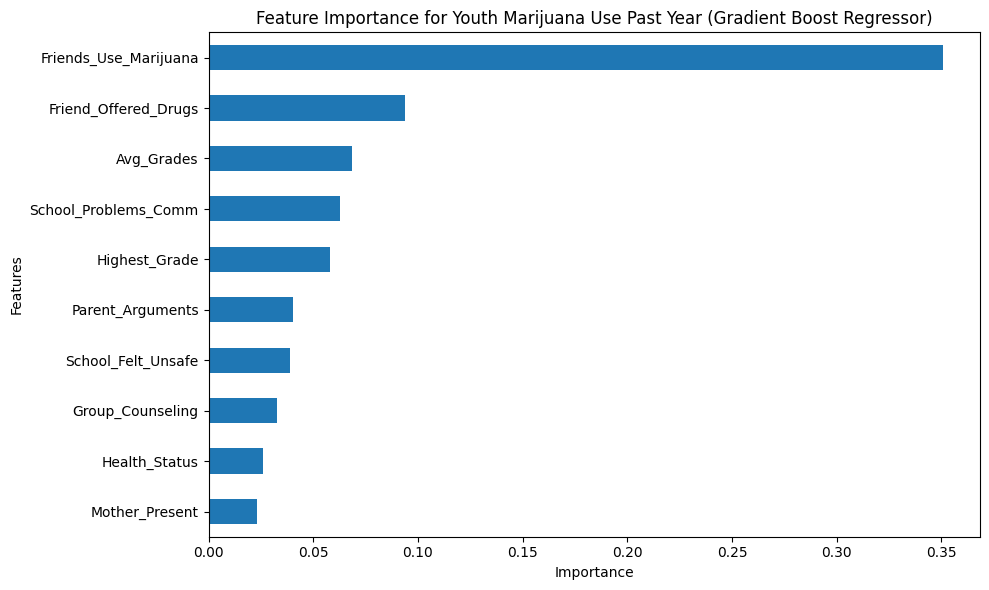

In [38]:
# see which features are most influential
importances = pd.Series(
    best_gboost.feature_importances_, 
    index = x_train.columns
).sort_values(ascending = True)

plt.figure(figsize = (10, 6))
importances.tail(10).plot(kind = 'barh')
plt.title("Feature Importance for Youth Marijuana Use Past Year (Gradient Boost Regressor)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [39]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.7, 0.8],
    'min_child_weight': [1, 3, 5]  # Equivalent to controlling model complexity like min_samples_split
}

reg_xgboost = XGBRegressor(objective = 'reg:squarederror', random_state = 5322)
grid_search = GridSearchCV(
    estimator = reg_xgboost,
    param_grid = param_grid,
    cv = 5,
    scoring = 'r2',
    n_jobs = -1,
    verbose = 1
)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=5322, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.6, 0.7, 0.8]},
             scoring='r2', verbose=1)

In [40]:
grid_search.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 100,
 'subsample': 0.6}

In [41]:
best_reg_xgboost = grid_search.best_estimator_

reg_xgboost_pred = best_reg_xgboost.predict(x_test)

r2 = r2_score(y_test, reg_xgboost_pred)
rmse = mean_squared_error(y_test, reg_xgboost_pred) ** .5
r2, rmse

(0.13457724791199654, 41.93275129356656)